In [30]:
##imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [31]:
## mounting on gdrive/comment for jupyter
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importação dos Dados

In [32]:
df_train = pd.read_csv('drive/MyDrive/Colab Notebooks/treino_309.csv')
df_test = pd.read_csv('drive/MyDrive/Colab Notebooks/BASE-PREPROCESSED(TESTE).gz', compression='gzip', sep='\t')

In [91]:
def create_split(df, target, drop_end=1):
    df = df.dropna()
    if 'PROPHET_NORM_FEATURES' in df.columns.values:
        df.drop(['PROPHET_NORM_FEATURES'], inplace=True, axis=1)
    if 'NEURO_LABEL' in df.columns.values:
        df.drop(['NEURO_LABEL'], inplace=True, axis=1)
    if 'PROPHET_LABEL' in df.columns.values:
        df.drop(['PROPHET_LABEL'], inplace=True, axis=1)
    return df[df.columns[:len(df.columns)-drop_end]].to_numpy(), df[[target]].to_numpy().reshape(-1)

In [34]:
df = df_train.drop(['PROPHET_NORM_FEATURES', 'NEURO_LABEL', 'Unnamed: 0'], axis = 1).append(df_test.drop(['PROPHET_NORM_FEATURES', 'NEURO_LABEL'], axis = 1))

In [36]:
X = df[df.columns].drop(['ALVO'], axis=1)
X.drop

,ATIVIDADE_EMAIL_PCNC_PNM_perc,ATIVIDADE_ENDERECO_PCNC_PNM_perc,ATIVIDADE_MERCADO_FINANCEIRO_PCNC_PNM_perc,ATIVIDADE_TELEFONE_PCNC_PNM_perc,BANCO_RELACIONAMENTO_PCNC_PCM_rv_0,BANCO_RELACIONAMENTO_PCNC_PCM_rv_1,BANCO_RELACIONAMENTO_PCNC_PCM_rv_2,CLASSE_SOCIAL_VIZINHANCA_PCNC_PCM_rv_0,CLASSE_SOCIAL_VIZINHANCA_PCNC_PCM_rv_1,COMPARATIVO_RENDA_PCNC_PNM_perc,CONCENTRACAO_ACADEMIAS_PCNC_PCM_rv_0,CONCENTRACAO_ACADEMIAS_PCNC_PCM_rv_1,CONCENTRACAO_ACADEMIAS_PCNC_PCM_rv_2,CONCENTRACAO_AEROPORTOS_PCNC_PCM_rv_0,CONCENTRACAO_AEROPORTOS_PCNC_PCM_rv_1,CONCENTRACAO_AGLOMERADO_SUBNORMAL_PCNC_PCM_rv_0,CONCENTRACAO_AGLOMERADO_SUBNORMAL_PCNC_PCM_rv_1,CONCENTRACAO_AGLOMERADO_SUBNORMAL_PCNC_PCM_rv_2,CONCENTRACAO_ALUGUEL_CARROS_PCNC_PCM_rv_0,CONCENTRACAO_ALUGUEL_CARROS_PCNC_PCM_rv_1,CONCENTRACAO_ALUGUEL_CARROS_PCNC_PCM_rv_2,CONCENTRACAO_AREA_RISCO_PCNC_PCM_rv_0,CONCENTRACAO_AREA_RISCO_PCNC_PCM_rv_1,CONCENTRACAO_AREA_RISCO_PCNC_PCM_rv_2,CONCENTRACAO_BANCOS_PCNC_PCM_rv_0,CONCENTRACAO_BANCOS_PCNC_PCM_rv_1,CONCENTRACAO_BANCOS_PCNC_PCM_rv_2,CONCENTRACAO_BARES_PCNC_PCM_rv_0,CONCENTRACAO_BARES_PCNC_PCM_rv_1,CONCENTRACAO_BARES_PCNC_PCM_rv_2,CONCENTRACAO_BEBIDAS_PCNC_PCM_rv_0,CONCENTRACAO_BEBIDAS_PCNC_PCM_rv_1,CONCENTRACAO_BEBIDAS_PCNC_PCM_rv_2,CONCENTRACAO_BOMBEIRO_PCNC_PCM_rv_0,CONCENTRACAO_BOMBEIRO_PCNC_PCM_rv_1,CONCENTRACAO_BOMBEIRO_PCNC_PCM_rv_2,CONCENTRACAO_CAIXA_ELETRONICO_PCNC_PCM_rv_0,CONCENTRACAO_CAIXA_ELETRONICO_PCNC_PCM_rv_1,CONCENTRACAO_CAIXA_ELETRONICO_PCNC_PCM_rv_2,CONCENTRACAO_CASA_NOTURNA_PCNC_PCM_rv_0,...,FLAG_WEB_SAUDE_PCNC_PCM_rv_0,FLAG_WEB_SAUDE_PCNC_PCM_rv_1,FLAG_WEB_SOCIEDADE_GENEALOGIA_PCNC_PCM_rv_0,FLAG_WEB_SOCIEDADE_GENEALOGIA_PCNC_PCM_rv_1,FLAG_WEB_SOCIEDADE_PCNC_PCM_rv_0,FLAG_WEB_SOCIEDADE_PCNC_PCM_rv_1,FLAG_WEB_TV_PCNC_PCM_rv_0,FLAG_WEB_TV_PCNC_PCM_rv_1,GENERO_PCNC_PCM_rv_0,GENERO_PCNC_PCM_rv_1,IDADE_PCNC_PNM_perc,LATITUDE_PCNC_PNM_perc,LONGITUDE_PCNC_PNM_perc,NIVEL_RELACIONAMENTO_AUTOMOVEL_PCNC_PNM_perc,NIVEL_RELACIONAMENTO_CREDITO_PCNC_PNM_perc,NIVEL_RELACIONAMENTO_SEGUROS_01_PCNC_PNM_perc,NIVEL_RELACIONAMENTO_SEGUROS_02_PCNC_PNM_perc,NIVEL_RELACIONAMENTO_VAREJO_PCNC_PNM_perc,PASSAGENS_EMAIL_PCNC_PNM_perc,PASSAGENS_ENDERECO_PCNC_PNM_perc,PASSAGENS_TELEFONE_PCNC_PNM_perc,PASSAGENS_WEB_PCNC_PNM_perc,PROPHET_LABEL,SCORE_RISCO_CADASTRAL_PCNC_PNM_perc,SCORE_RISCO_DEMOGRAFICO_PCNC_PNM_perc,SCORE_RISCO_GEORREFERENCIADO_PCNC_PNM_perc,SCORE_RISCO_WEB_PCNC_PNM_perc,SIGLA_PARTIDO_FILIADO_PCNC_PCM_rv_0,STATUS_RESTITUICAO_IRPF_PCNC_PCM_rv_0,STATUS_RESTITUICAO_IRPF_PCNC_PCM_rv_1,STATUS_RESTITUICAO_IRPF_PCNC_PCM_rv_2,UF_PCNC_PCM_rv_0,UF_PCNC_PCM_rv_1,UF_PCNC_PCM_rv_2,UF_PCNC_PCM_rv_3,ULTIMA_PASSAGEM_EMAIL_PCNC_PNM_perc,ULTIMA_PASSAGEM_ENDERECO_PCNC_PNM_perc,ULTIMA_PASSAGEM_MERCADO_FINANCEIRO_PCNC_PNM_perc,ULTIMA_PASSAGEM_TELEFONE_PCNC_PNM_perc,VALOR_PARCELA_BOLSA_FAMILIA_PCNC_PNM_perc
0,0.400,0.268,0.200,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.196999,-15.233475,-59.328518,0.0,0.000,0.3,0.667,0.000,0.074,0.000,1.000,0.001,0.0,0.608700,0.549318,0.957772,0.420847,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.147235,2.471023,3.750000,7.406249,134.0
1,1.000,1.000,1.000,1.000,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.893000,-30.047363,-34.984375,0.0,0.083,0.3,0.000,0.063,1.000,1.000,1.000,0.001,1.0,0.518692,0.806152,0.964457,0.447420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.234374,0.623947,15.999999,7.406249,22.0
2,1.000,1.000,0.095,1.000,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.841000,-30.047363,-34.984375,0.0,0.125,0.3,0.667,0.000,1.000,1.000,1.000,0.013,0.0,0.637903,0.806152,0.964457,0.478518,0.0,0.0,0.0,0.0,0.0,0.0,0

In [47]:
X.drop('PROPHET_LABEL', axis=1, inplace=True)

In [37]:
y = df.ALVO

In [48]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(X, y)
tree.feature_importances_

array([1.09614309e-02, 1.87231609e-02, 3.76150506e-02, 1.49103611e-02,
       5.36067460e-04, 6.05709891e-04, 5.47366183e-04, 1.35914217e-03,
       9.07572365e-04, 6.26611973e-03, 0.00000000e+00, 5.43060146e-04,
       9.02156013e-04, 2.06830374e-03, 1.02704601e-03, 9.19450332e-04,
       1.50610772e-03, 1.50503524e-03, 0.00000000e+00, 2.05347297e-03,
       6.56887367e-04, 1.85860335e-03, 9.07073180e-04, 2.37619920e-03,
       0.00000000e+00, 8.70308173e-04, 1.44635160e-03, 5.72125083e-04,
       1.43124822e-03, 1.67047606e-03, 1.41114811e-03, 1.02747953e-03,
       4.64653595e-04, 0.00000000e+00, 1.22693929e-03, 6.30279899e-04,
       0.00000000e+00, 8.64487440e-04, 5.82809063e-04, 0.00000000e+00,
       1.21242031e-03, 3.75712810e-04, 2.44364371e-03, 1.05781877e-03,
       1.27044770e-03, 1.83952874e-03, 1.70894477e-03, 5.67790970e-04,
       0.00000000e+00, 7.40118047e-04, 1.45844422e-03, 1.38863300e-03,
       8.32712697e-04, 1.51209369e-03, 1.55309072e-03, 9.52389954e-04,
      

In [66]:
feat_imp = tree.feature_importances_
cols_to_use = X[X.columns.values[np.where(feat_imp>5e-3)]].columns.values

In [71]:
cols_to_use = np.append(cols_to_use, df_test.columns[0])

In [72]:
df_train = df_train[cols_to_use]
df_test = df_test[cols_to_use]

In [92]:
X_train = df_train[df_train.drop(['ALVO'], axis=1).columns.values]
y_train = df_train.ALVO


In [97]:
X_test = df_test[df_test.drop(['ALVO'], axis=1).columns.values]
y_test = df_test.ALVO

# Primeiro Modelo: Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
forest = RandomForestClassifier(max_features=6, n_estimators=100)

In [95]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [98]:
y_pred = forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

In [99]:
metrics_dict = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1': f1, 'ROC-AUC': roc}

In [100]:
metrics_df = pd.DataFrame(metrics_dict.items(), index = metrics_dict.keys(), columns=['Métrica', 'Valor'])

In [101]:
metrics_df

,Métrica,Valor
Accuracy,Accuracy,0.981480
Recall,Recall,0.978689
Precision,Precision,0.999705
F1,F1,0.989085
ROC-AUC,ROC-AUC,0.988475


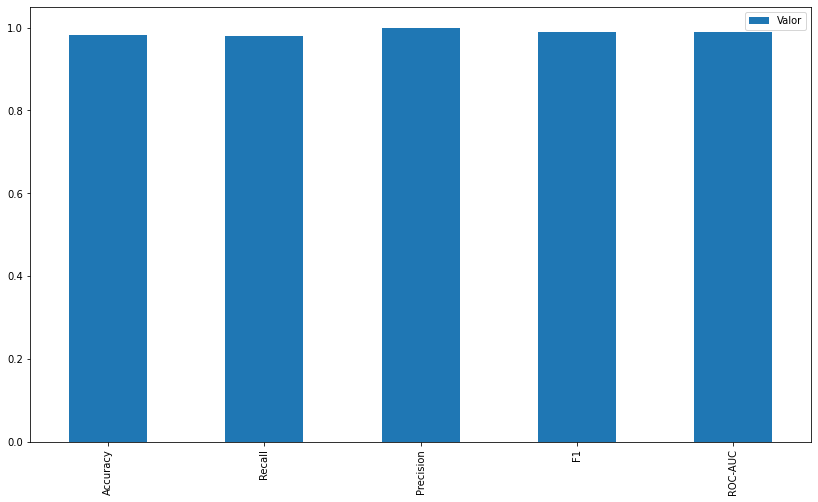

In [102]:
metrics_df.plot(kind='bar',figsize=(14,8))

In [65]:
from scipy.stats import ks_2samp
ks_2samp(y_pred, y_test)

Ks_2sampResult(statistic=0.14258128139860285, pvalue=0.0)

In [ ]:
import pickle
f = open('./models/RandomForest', 'wb')
pickle.dump(forest, f)

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbrt = GradientBoostingClassifier(max_depth = 25)

In [ ]:
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=25)

In [12]:
y_pred = gbrt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

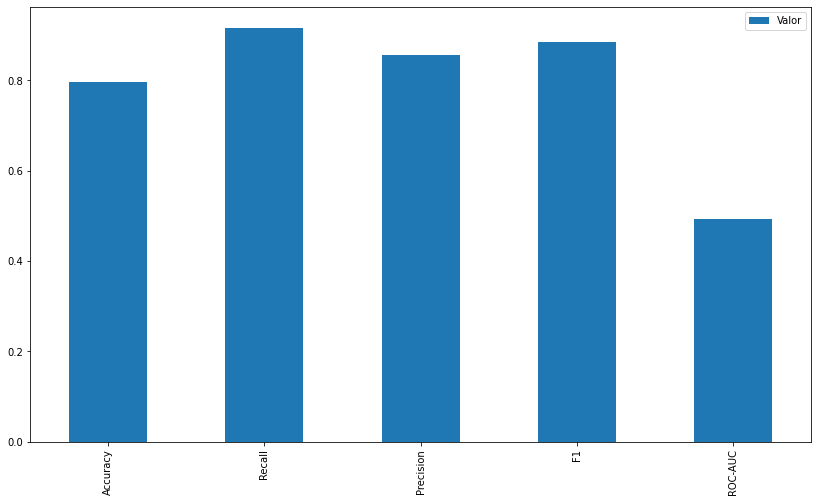

In [13]:
metrics_dict = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1': f1, 'ROC-AUC': roc}

metrics_df = pd.DataFrame(metrics_dict.items(), index = metrics_dict.keys(), columns=['Métrica', 'Valor'])

metrics_df.plot(kind='bar',figsize=(14,8))

In [ ]:
import pickle
f = open('./models/GradientBoosting', 'wb')
pickle.dump(gbrt, f)

# Ensemble MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
baggingClassifier = BaggingClassifier(
    base_estimator = MLPClassifier(hidden_layer_sizes = (16)),
    max_samples = 0.75,
    max_features = 0.75,
    n_estimators = 5
)

In [ ]:
baggingClassifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=MLPClassifier(hidden_layer_sizes=16),
                  max_features=0.75, max_samples=0.75, n_estimators=5)

In [ ]:
y_pred = baggingClassifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

<AxesSubplot:>

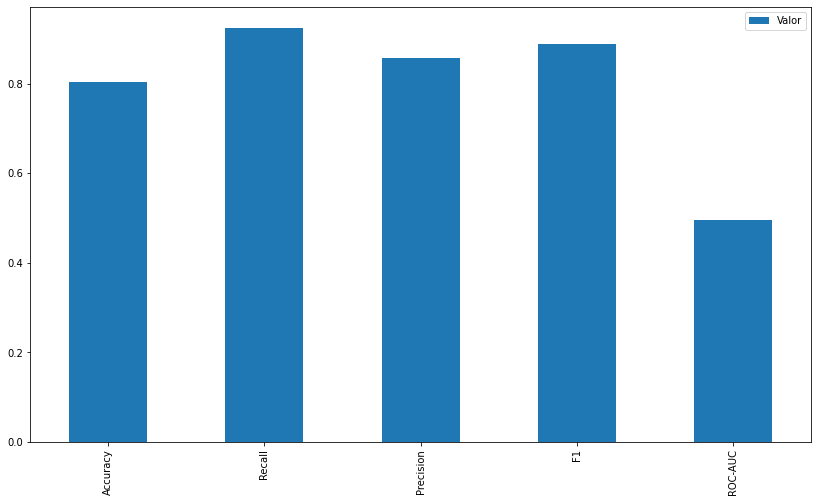

In [ ]:
metrics_dict = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1': f1, 'ROC-AUC': roc}

metrics_df = pd.DataFrame(metrics_dict.items(), index = metrics_dict.keys(), columns=['Métrica', 'Valor'])

metrics_df.plot(kind='bar',figsize=(14,8))

In [ ]:
from scipy.stats import ks_2samp

In [ ]:
from scipy.stats import ks_2samp
ks_2samp(y_pred, y_test)

KstestResult(statistic=0.06861353063574266, pvalue=0.0)

In [ ]:
import pickle
f = open('./models/BaggingClassifierMLP', 'wb')
pickle.dump(baggingClassifier, f)

# Ensemble de Modelos por Max Voting

In [10]:
#model imports
import pickle

In [11]:
rf = pickle.load(open('drive/MyDrive/Colab Notebooks/RandomForest', 'rb'))
gbrt = pickle.load(open('drive/MyDrive/Colab Notebooks/GradientBoosting', 'rb'))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DummyClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.1 when using version 0.22.2.post1. This might lead to breakin

In [ ]:
pred1=rf.predict(X_test)
pred2=gbrt.predict(X_test)

In [ ]:
from scipy import stats
final_pred = []
for i in range(0,len(X_test)):
    final_pred.append(stats.mode([pred1[i], pred2[i]])[0][0])

In [ ]:
accuracy = accuracy_score(y_test, final_pred)
recall = recall_score(y_test, final_pred)
precision = precision_score(y_test, final_pred)
f1 = f1_score(y_test, final_pred)
roc = roc_auc_score(y_test, final_pred)

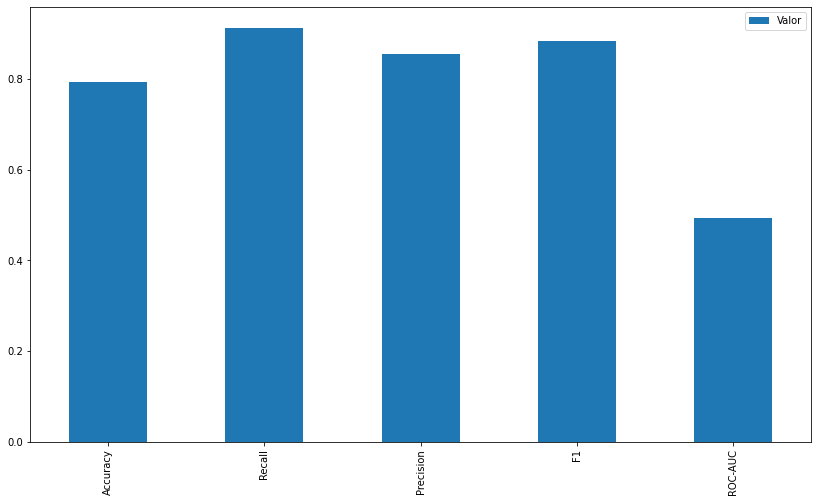

In [ ]:
metrics_dict = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1': f1, 'ROC-AUC': roc}

metrics_df = pd.DataFrame(metrics_dict.items(), index = metrics_dict.keys(), columns=['Métrica', 'Valor'])

metrics_df.plot(kind='bar',figsize=(14,8))